<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to NLP Fundamentals in TensorFlow.

 NLP has the goal of deriving information out of natural language (could be sequence of text or words).
 Another common term for NLP problems is sequence to sequence problems (seq2seq).

In [2]:
# Check for GPU.

!nvidia-smi

Sun Mar  9 01:59:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
## Get helper functions.
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2025-03-09 01:59:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-03-09 01:59:32 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get our text dataset.

The dataset we're going to be using is Kaggle's introduction to NLP dataset(text samples of Tweets labelled as diaster or not diaster).


In [4]:
!wget  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip data.
unzip_data("nlp_getting_started.zip")

--2025-03-09 01:59:33--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 74.125.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2025-03-09 01:59:33 (128 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Reading the file with pandas.
import pandas as pd

train_df  = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Lets' shuffle our dataFrame.
train_df_shuffled = train_df.sample(
    frac=1,   # Frac is what percentage of the data to shuffle, 1 is equal to 100
    random_state=42
)

In [7]:
# What are the totoal number of samples.

len(train_df), len(test_df)

(7613, 3263)

In [8]:
# Let's visualize some random sample examples.
import random
random_index = random.randint(0, len(train_df)-5)    # create random indexes not higher than the totla number of samples.
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Palestinian Teen Killed Amid Protests Against Arson Attack http://t.co/okVsImoGic

---

Target: 0 (not real disaster)
Text:
#frontpage: #Bioterror lab faced secret sanctions. #RickPerry doesn't make the cut for @FoxNews #GOPDebate http://t.co/fZujg7sXJg @USATODAY

---

Target: 0 (not real disaster)
Text:
My emotions are a train wreck. My body is a train wreck. I'm a wreck

---

Target: 1 (real disaster)
Text:
#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic intensity 0 Iwate Miyagi JST #?? http://t.co/gMoUl9zQ2Q

---

Target: 0 (not real disaster)
Text:
A look at state actions a year after Ferguson's upheaval http://t.co/GZEkQWzijq

---



## Split data into training and validation sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Use trian_test_split to split training data into traning and validation sets.

train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [11]:
# Check the first 10 samples.
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text to numbers.

When dealing with text problems one of the first thing we have to do before we build the model is to convert the text to numbers. There are few ways to do this.

1. Tokenization: Direct mapping of Tokenization
2. Embedding: Create a matrix of feature vector for each token.

## Text Vectorization (tokenization)

In [12]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [13]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D


# Use the default TextVectorization parameters.
text_vectorizer = TextVectorization(
    max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
    standardize="lower_and_strip_punctuation", # how to process text.
    split="whitespace", # how to split tokens
    ngrams=None, # create groups of n-words?
    output_mode="int", # how to map tokens to numbers
    output_sequence_length=None, # how long should the output sequence of tokens be?
    # pad_to_max_tokens=True
)

In [14]:
# Find the average numbers of token (words) in the traning data.
average_number_of_token = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
average_number_of_token

15

In [15]:
# Setup text vectorization variables.
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = average_number_of_token # max length our sequences will be (e.g. how many words from a Tweet does our model see?)


# recreating the intance of text_vectorization.
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode="int",
    output_sequence_length=max_length
)

In [16]:
# Fit the text vectorizer to the traning text.

text_vectorizer.adapt(train_sentences)

In [17]:
# Create a sample sentence and tokenize it.
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [18]:
# Choose a random sentence from the training dataset and tokenize it.
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text:
 Newlyweds feed thousands of Syrian refugees instead of hosting a banquet wedding dinner http://t.co/EGcv7ybjae #Age #news        

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2842, 2116,  981,    6, 1250,  313,  845,    6, 2946,    3, 6132,
        1161, 3052,    1, 2567]])>

In [19]:
# Get the unique words in the vocabulary.
words_in_vocab = text_vectorizer.get_vocabulary()  # get all of the unique words.
top_5_words = words_in_vocab[:5]  # get the most commmon words.
bottom_5_words = words_in_vocab[-5:]  # get the least common words.
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding layer.

To make our embedding, we're going to use Tensorflows embedding layer.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The paramters we care most about for our embedding layer:
1. 'input_dim' = Size of our input vocab.
2. 'output_dim' = Size of the output embedding vector.

example, a value of 100 would mean each token gets represented by a vector 100 long.
3. 'input_length' = length of the sequences being passed to the embedding layer.

In [20]:
from tensorflow.keras import layers

embedding = layers.Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,     # Neural networks works with numbers that are divible by 8.
)

embedding

<Embedding name=embedding, built=False>

In [21]:
# Get a random sentence from the training set.
random_sentence = random.choice(train_sentences)

print(f"Original text: \n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(
    text_vectorizer([random_sentence])
)

sample_embed


Original text: 
 Even if u have your weapon and your badge we gonna put them choppas on your ass????        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00019504, -0.0094027 , -0.04911921, ...,  0.04505366,
          0.02472807, -0.04819974],
        [ 0.00860446,  0.02519396, -0.02535843, ...,  0.02818653,
          0.03521777, -0.03052591],
        [-0.01914489, -0.02428963, -0.0328493 , ..., -0.01905164,
         -0.04241164, -0.04319149],
        ...,
        [ 0.00757345, -0.03087609, -0.01955909, ..., -0.0468734 ,
         -0.00423303,  0.02252777],
        [-0.01277662,  0.00342995, -0.01623639, ..., -0.0344887 ,
          0.01361359,  0.04308871],
        [-0.03079158,  0.03366927,  0.01530738, ...,  0.02380292,
         -0.00177531, -0.00080956]]], dtype=float32)>

In [22]:
# Check out a single tokne's embedding.

sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.00019504, -0.0094027 , -0.04911921,  0.03836025, -0.04100911,
         0.02296429,  0.03302294, -0.00332393,  0.00171871, -0.01979619,
        -0.01976367,  0.04852686, -0.0182454 ,  0.03272375, -0.03649963,
         0.01962134,  0.03960614, -0.00512426,  0.04805163,  0.04547992,
         0.01234446,  0.02789525,  0.03361236, -0.02260684,  0.00481169,
        -0.00594624, -0.00420272, -0.04076644,  0.03766102, -0.01065935,
        -0.0300711 ,  0.02402565, -0.04148446,  0.02505535,  0.04968171,
         0.01063408,  0.0467633 , -0.03712362, -0.04599217, -0.0343427 ,
        -0.01100691,  0.04222559, -0.0151077 , -0.00232918,  0.02423361,
         0.02640884, -0.04984995,  0.02658634,  0.03048852, -0.01979203,
         0.00029599,  0.01563572, -0.04900588, -0.04123142,  0.02930093,
         0.04139448, -0.03690103, -0.02880573, -0.01864078,  0.01086856,
        -0.02108428, -0.03459749, -0.03703182,  0.00802722,  0.01895766,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

we'll start with a baseline and move on from there.

* Model 0: Build a Naive Bayes (baseline): https://scikit-learn.org/stable/modules/naive_bayes.html

* Model 1: Feed-forward neural network (dense model)

* Model 2: LSTM model (RNN)

* Model 3: GRU model (RNN)

* Model 4: Bidirectional_LSTM model (RNN)

* Model 5: 1D Convolutional Neural Network(CNN)

* Model 6: TensorFlow Hub Pretrained Feature extractor (using transfer learning for NLP)

* Model 7: Same as model 6 with 10% of traning data


Wei'll use the standard stpes in modelling.

* Create a model.
* Build a model
* Fit the model
* Evaluate our model.


### Model 0: Getting a baseline.

As with all ML modelling experiments, it's important to create a baseline.

We'll use Sklearn Multinomial Naive Bayes to classify our Tweets.
NB: It's always good to use Non ML Algo for baseline because of thier speed.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB   # One of the model in the Naive bayes.
from sklearn.pipeline import Pipeline


# Create Tokenization and modelling pipeline.
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),          # Convert words to numbers
    ("clf", MultinomialNB())   # Model the text.
])

# Fit the pipeline to the traning data.
model_0.fit(train_sentences, train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
# Evalaute our baseline model.

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [28]:
# Make predictions.
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [43]:
# Creating an evaluation function to evaluate our model.
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.
    """
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1
    }
    return model_results

In [44]:
# Calling the calculated evaluation results.
baseline_results = calculate_results(y_true=val_labels, y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [45]:
# Turn our baseline_results into a DF.
baseline_df = pd.DataFrame(
    baseline_results,
    index=["baseline"]
)
baseline_df

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219


<Axes: >

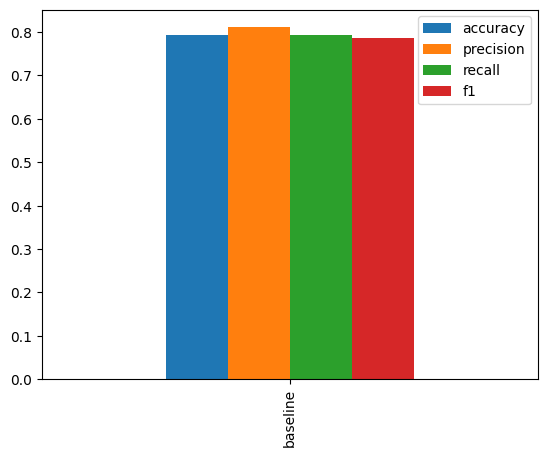

In [46]:
# Plot our baseline_df.
pd.DataFrame(baseline_df).plot.bar()

## Model 1: Feed-forward neural network (Dense model)

In [47]:
# Create a tensorboard callbac(ned to create a new one for a new model).
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs.
SAVE_DIR = "model_logs"

In [53]:
# Build model with the Functional API.
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=(1,), dtype=tf.string)  # inputs are 1-dimentional strings.

# Converting our string input to integers.
x = text_vectorizer(inputs)

# Create an Embedding of the numberized inputs.
x = embedding(x)

# Applying GlobalAveragePooling1D to reduce dimentionality.
x = layers.GlobalAveragePooling1D()(x)

# Create output layer. We'll use Sigmoid activation since we're dealing with Biniary.
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [54]:
# Get the summary of our model.
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Compile model.
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [56]:
# Fit the model
model_1_history = model_1.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="model_1_dense")
    ]
)

Saving TensorBoard log files to: model_logs/model_1_dense/20250309-023158
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6427 - loss: 0.6489 - val_accuracy: 0.7454 - val_loss: 0.5357
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8140 - loss: 0.4620 - val_accuracy: 0.7835 - val_loss: 0.4733
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8644 - loss: 0.3539 - val_accuracy: 0.7887 - val_loss: 0.4607
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8886 - loss: 0.2890 - val_accuracy: 0.7966 - val_loss: 0.4701
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9136 - loss: 0.2339 - val_accuracy: 0.7887 - val_loss: 0.4862


In [60]:
# Get the summary.
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [58]:
# Check results.

model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.5211


[0.48619917035102844, 0.7887139320373535]

In [59]:
# Make some predictions and evaluate those.
model_1_preds_probs = model_1.predict(val_sentences)
model_1_preds_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(762, 1)

In [62]:
model_1_preds_probs[:10]

array([[0.30783212],
       [0.70458543],
       [0.9976325 ],
       [0.10882159],
       [0.12986632],
       [0.92512774],
       [0.9042531 ],
       [0.9913583 ],
       [0.9612324 ],
       [0.2535164 ]], dtype=float32)

In [64]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

NB: We can't compare our model_1_preds_probs to val_labels since our model_2_preds_probs is in the form of prob. Hence we must round on/off

In [65]:
# Convert model prediction prob to label format.
model_1_preds = tf.squeeze(tf.round(model_1_preds_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
# Calculate model_1 results.
model_1_results = calculate_results(y_true=val_labels, y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7887139107611548,
 'precision': 0.7969619064252174,
 'recall': 0.7887139107611548,
 'f1': 0.7847294282013199}

In [68]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

 NB: Our baseline_results outperforms our model_1_results. This shows that not every experiment you run will improve our model performance.

## Visualizing learned embeddings.

delving deep into embeddings.

In [69]:
# Get the vocabulrary form the text vectorization layer.
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [71]:
# Model 1 summary.
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [72]:
# Get the weight matrix of the embedding layer. They are the numerical representation of our training data which have been learned for 5 epochs.
embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[ 0.02165552, -0.01973175, -0.01720406, ..., -0.02473869,
          0.06083474,  0.02163026],
        [ 0.00067257,  0.01400043, -0.02707845, ..., -0.04666077,
          0.02732396,  0.03146327],
        [ 0.04695686, -0.00269137, -0.04329579, ..., -0.06478777,
          0.05585841, -0.06074974],
        ...,
        [-0.02894657, -0.03787171, -0.0466353 , ...,  0.02050136,
          0.02085264,  0.00705944],
        [ 0.02043501,  0.03114822, -0.07177934, ..., -0.01913669,
          0.06959923, -0.06499067],
        [ 0.0960093 ,  0.09311602, -0.06626742, ..., -0.04335945,
          0.05696269, -0.08342172]], dtype=float32)]

Now we've got the embedding matrix ouur model has learned to represent our tokens, let's see how we can visualize it.

To do so, tf has a handy tool call projector: https://projector.tensorflow.org/

In [78]:
# Create embedding files. This code is gotton from doc. https://www.tensorflow.org/text/guide/word_embeddings
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# Get the total number of vectors in the embedding weights
num_vectors = embed_weights[0].shape[0]

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.

  # Only write vectors if the index is within the valid range
  if index < num_vectors:
    vec = embed_weights[0][index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
  else:
    # for safety , we are breaking when index is greater or equals num_vectors
    break
out_v.close()
out_m.close()

In [79]:
# Download files from coloab to projector.
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>